In [14]:
from langgraph.graph import StateGraph , START , END
from typing import TypedDict
from dotenv import load_dotenv

In [15]:
load_dotenv()

True

In [16]:
from langchain_google_genai import ChatGoogleGenerativeAI
model = ChatGoogleGenerativeAI(model="gemini-1.5-flash") 

In [17]:
# create a state 
class BlogState(TypedDict):
    title:str
    outline:str
    content:str

In [18]:
def create_outline(state: BlogState) -> BlogState:

    # Fetch the title from the state 
    title = state['title']
    # call the llm to generate an outline
    propmt = f"Generate a detailed  outline for a blog on the topic: {title}"
    outline= model.invoke(propmt).content

    # update state
    state['outline']=outline
    return state

In [19]:
# create a blog

def create_blog(state: BlogState) -> BlogState:
    title = state['title']
    outline = state['outline']

    prompt = f'Write a detailed blog on the title - {title} using the following outline \n {outline}'
    content = model.invoke(prompt).content
    state['content'] = content
    return state

In [20]:
graph = StateGraph(BlogState)

#nodes 

graph.add_node('create_outline', create_outline)
graph.add_node('create_Blog', create_blog)


# edges

graph.add_edge(START, 'create_outline')
graph.add_edge('create_outline', 'create_Blog')
graph.add_edge('create_Blog', END)

workflow = graph.compile()

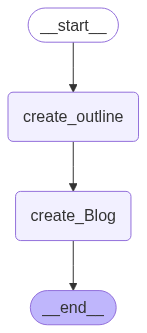

In [21]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [24]:
initial_state = {'title': 'Rise of Agentic ai  in pakistan in 100  words  , in keypoints'}

final_state = workflow.invoke(initial_state)

print(final_state['content'])

## Rise of Agentic AI in Pakistan: A Nascent Revolution

**I. Introduction:** Agentic AI, capable of independent action, is globally transforming industries.  Its potential impact on Pakistan is immense, promising efficiency and innovation.

**II. Current State:**  Pakistan's adoption is limited, but burgeoning tech interest hints at growth.  While specific examples are nascent, early-stage startups are exploring AI applications.

**III. Drivers of Growth:** Government digitalization pushes and a growing pool of tech talent fuel AI development. Agentic AI offers solutions for agriculture optimization and improved healthcare access.

**IV. Challenges:**  Inadequate infrastructure, data limitations, ethical concerns surrounding autonomous systems, and a shortage of specialized AI expertise hinder progress.

**V. Future Outlook:** Agentic AI can revolutionize Pakistan's sectors. Strategic investments, robust regulations, and a focus on responsible AI development are crucial for realizing 

In [25]:
print(final_state['outline'])

I. Introduction: Agentic AI's global rise and its potential impact on Pakistan.

II. Current State:  Limited adoption but growing interest in Pakistan's tech sector.  Mention specific examples (if any).

III. Drivers of Growth:  Government initiatives, rising tech talent,  potential for solving local problems (e.g., agriculture, healthcare).

IV. Challenges:  Infrastructure limitations, data scarcity, ethical concerns, lack of skilled workforce.

V. Future Outlook:  Potential for significant impact across various sectors, need for strategic investment & regulation.  Call to action:  fostering responsible AI development.
